<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/AI-ML/blob/main/SEM1/ML/dtree_Software_Defects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
import matplotlib.pyplot as plt

In [6]:
from scipy.io import arff
import pandas as pd

df = arff.loadarff("/content/PC1.arff")
data = pd.DataFrame(df[0])


In [7]:
originalfeatures= data.columns
print('original features len', len(originalfeatures))
print('original features', (originalfeatures))
print(data.head())

original features len 22
original features Index(['loc', 'v(g)', 'ev(g)', 'iv(G)', 'N', 'V', 'L', 'D', 'I', 'E', 'B', 'T',
       'lOCode', 'lOComment', 'locCodeAndComment', 'lOBlank', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'class'],
      dtype='object')
     loc   v(g)  ev(g)  iv(G)       N         V     L      D       I  \
0    1.1    1.4    1.4    1.4     1.3      1.30  1.30   1.30    1.30   
1    1.0    1.0    1.0    1.0     1.0      1.00  1.00   1.00    1.00   
2   91.0    9.0    3.0    2.0   318.0   2089.21  0.04  27.68   75.47   
3  109.0   21.0    5.0   18.0   381.0   2547.56  0.04  28.37   89.79   
4  505.0  106.0   41.0   82.0  2339.0  20696.93  0.01  75.93  272.58   

            E  ...  lOCode  lOComment  locCodeAndComment  lOBlank  uniq_Op  \
0        1.30  ...     2.0        2.0                2.0      2.0      1.2   
1        1.00  ...     1.0        1.0                1.0      1.0      1.0   
2    57833.24  ...    80.0       44.0       

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                1109 non-null   float64
 1   v(g)               1109 non-null   float64
 2   ev(g)              1109 non-null   float64
 3   iv(G)              1109 non-null   float64
 4   N                  1109 non-null   float64
 5   V                  1109 non-null   float64
 6   L                  1109 non-null   float64
 7   D                  1109 non-null   float64
 8   I                  1109 non-null   float64
 9   E                  1109 non-null   float64
 10  B                  1109 non-null   float64
 11  T                  1109 non-null   float64
 12  lOCode             1109 non-null   float64
 13  lOComment          1109 non-null   float64
 14  locCodeAndComment  1109 non-null   float64
 15  lOBlank            1109 non-null   float64
 16  uniq_Op            1109 

In [11]:
data['class'].unique()

array([b'false', b'true'], dtype=object)

In [13]:
# Define a mapping function to convert various representations to integers
def map_to_int(value):
    if value == b'false':
        return 1
    elif value == b'true':
        return 0
    else:
        return None

# Apply the mapping function to the 'object_column' and create a new column 'integer_column'
data['defects'] = data['class'].apply(map_to_int)

print(data['defects'])

0       1
1       0
2       0
3       0
4       0
       ..
1104    1
1105    1
1106    1
1107    1
1108    1
Name: defects, Length: 1109, dtype: int64


In [14]:
data['defects'].unique()

array([1, 0])

In [18]:
X=data.drop(labels=['defects', 'class'], axis=1)
y=data['defects']

# Information Gain

In [16]:
from sklearn.feature_selection import mutual_info_classif

In [19]:
mutual_info=mutual_info_classif(X,y)

In [20]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

,0
I,0.059032
V,0.048923
lOBlank,0.044425
uniq_Opnd,0.043804
total_Op,0.042809
T,0.042259
E,0.040406
loc,0.037600
N,0.036159
total_Opnd,0.030776


# constant feature and non -constant feature

In [23]:
from sklearn.feature_selection import VarianceThreshold

In [24]:
X.head()

,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,...,T,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,1.30,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,3212.96,80.0,44.0,11.0,31.0,29.0,66.0,192.0,126.0,17.0
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,4015.70,97.0,41.0,12.0,24.0,28.0,75.0,229.0,152.0,38.0
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,87305.94,457.0,71.0,48.0,49.0,64.0,397.0,1397.0,942.0,178.0


In [25]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [ ]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [26]:
### Finding non constant features
sum(var_thres.get_support())

np.int64(21)

In [27]:
# Lets Find non-constant features
len(X.columns[var_thres.get_support()])

21

In [28]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]

print(len(constant_columns))

0


In [29]:
for column in constant_columns:
    print(column)

In [30]:
X.drop(constant_columns,axis=1)

,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,...,T,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,1.30,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,3212.96,80.0,44.0,11.0,31.0,29.0,66.0,192.0,126.0,17.0
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,4015.70,97.0,41.0,12.0,24.0,28.0,75.0,229.0,152.0,38.0
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,87305.94,457.0,71.0,48.0,49.0,64.0,397.0,1397.0,942.0,178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,6.0,4.0,4.0,1.0,26.0,96.21,0.08,13.33,7.22,1282.82,...,71.27,6.0,0.0,0.0,2.0,10.0,3.0,18.0,8.0,7.0
1105,10.0,5.0,5.0,1.0,43.0,182.66,0.05,21.00,8.70,3835.88,...,213.10,10.0,0.0,0.0,1.0,14.0,5.0,28.0,15.0,9.0
1106,5.0,3.0,3.0,1.0,17.0,62.91,0.21,4.80,13.11,301.96,...,16.78,5.0,0.0,0.0,0.0,8.0,5.0,11.0,6.0,5.0
1107,18.0,8.0,5.0,5.0,111.0,613.12,0.04,22.92,26.75,14050.56,...,780.59,18.0,0.0,0.0,1.0,22.0,24.0,61.0,50.0,15.0


# correlation between independent variable

In [31]:
#importing libraries
# from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

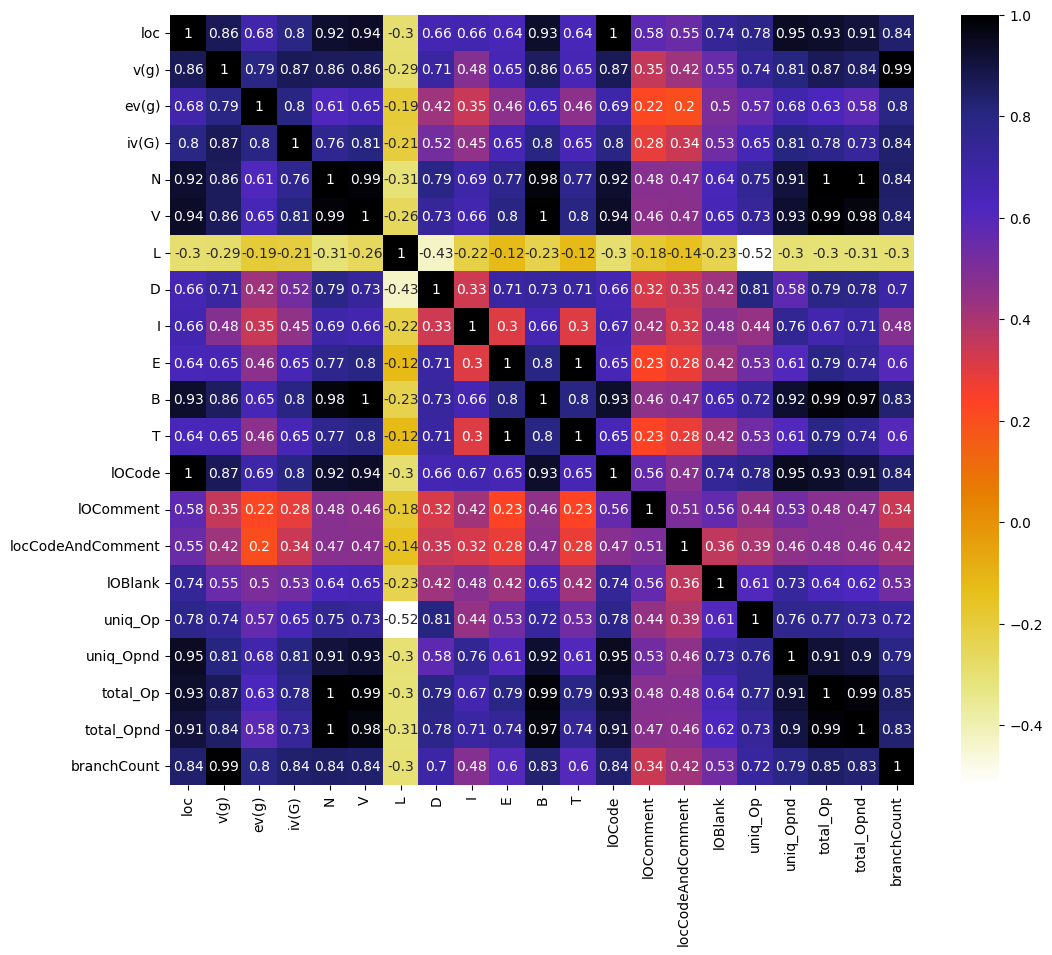

In [32]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [33]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [34]:
corr_features = correlation(X, 0.95)
len(set(corr_features))

7

In [35]:
corr_features

{'B', 'T', 'V', 'branchCount', 'lOCode', 'total_Op', 'total_Opnd'}

In [36]:
X=X.drop(['B', 'T', 'V', 'branchCount', 'lOCode', 'total_Op', 'total_Opnd'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                1109 non-null   float64
 1   v(g)               1109 non-null   float64
 2   ev(g)              1109 non-null   float64
 3   iv(G)              1109 non-null   float64
 4   N                  1109 non-null   float64
 5   L                  1109 non-null   float64
 6   D                  1109 non-null   float64
 7   I                  1109 non-null   float64
 8   E                  1109 non-null   float64
 9   lOComment          1109 non-null   float64
 10  locCodeAndComment  1109 non-null   float64
 11  lOBlank            1109 non-null   float64
 12  uniq_Op            1109 non-null   float64
 13  uniq_Opnd          1109 non-null   float64
dtypes: float64(14)
memory usage: 121.4 KB


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state = 100)

In [38]:
print("X=",X_train.head())
print("Y=",y_train.head())
print("X_test=",X_test.head())
print("y_test=",y_test.head())


X=        loc  v(g)  ev(g)  iv(G)      N     L      D      I         E  \
268   11.0   1.0    1.0    1.0   41.0  0.14   6.92  27.50   1318.14   
1027  35.0   6.0    4.0    5.0  305.0  0.03  29.85  63.04  56178.07   
761    7.0   3.0    1.0    2.0   34.0  0.09  11.00  13.13   1588.72   
217   29.0   6.0    5.0    2.0  159.0  0.04  24.00  36.38  20956.91   
420   44.0   6.0    1.0    3.0  182.0  0.05  22.17  47.47  23323.93   

      lOComment  locCodeAndComment  lOBlank  uniq_Op  uniq_Opnd  
268        18.0                0.0     11.0     12.0       13.0  
1027        7.0                0.0      7.0     21.0       51.0  
761         0.0                0.0      4.0     11.0        8.0  
217         6.0                0.0      9.0     18.0       27.0  
420        27.0                1.0     11.0     19.0       36.0  
Y= 268     1
1027    1
761     1
217     1
420     1
Name: defects, dtype: int64
X_test=       loc  v(g)  ev(g)  iv(G)      N     L      D      I         E  lOComment  \
423 

In [39]:
from sklearn.tree import DecisionTreeClassifier

best_acc = 0

for criterion in "gini", "entropy":
    for max_depth in [2,3,4,5,6]:
        for min_samples_leaf in [5, 10, 20, 30]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            predicitions = dtree.predict(X_test)
            acc = accuracy_score(y_test, predicitions)
            if acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = acc

In [41]:
best_acc

0.93993993993994

In [40]:
best_params

'criterion: gini, max_depth: 2, min_samples_leaf: 5'

In [42]:
def train_using_gini(X_train, X_test, y_train):

	# Creating the classifier object
	clf_gini = DecisionTreeClassifier(criterion = "gini",
			random_state = 100,max_depth=2, min_samples_leaf=5)

	# Performing training
	clf_gini.fit(X_train, y_train)
	return clf_gini

In [43]:
# Function to make predictions
def prediction(X_test, clf_object):

# Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [45]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):

    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))

    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)

    print("Report : ")
    print(classification_report(y_test, y_pred))

In [46]:
# Prediction using gini
clf_gini = train_using_gini(X_train, X_test, y_train)
y_pred_gini = prediction(X_test, clf_gini)
print(cal_accuracy(y_test, y_pred_gini))

Predicted values:
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Confusion Matrix:  [[  1  19]
 [  1 312]]
Accuracy :  93.993993993994
Report : 
              precision    recall  f1-score   support

           0       0.50      0.05      0.09        20
           1       0.94      1.00      0.97       313

    accuracy                           0.94       333
   macro